<a href="https://colab.research.google.com/github/Makanisaikiran/Amazon-sales-report/blob/main/amazon_sales_report_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
# Part 1: Setup and Data Loading

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Set the style for seaborn
sns.set(style="whitegrid")

In [97]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Amazon Sale Report.csv')

In [98]:
# Basic data exploration
print(df.head())
print(df.info())
print(df.describe())

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

<ipython-input-98-48b4781c2018>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


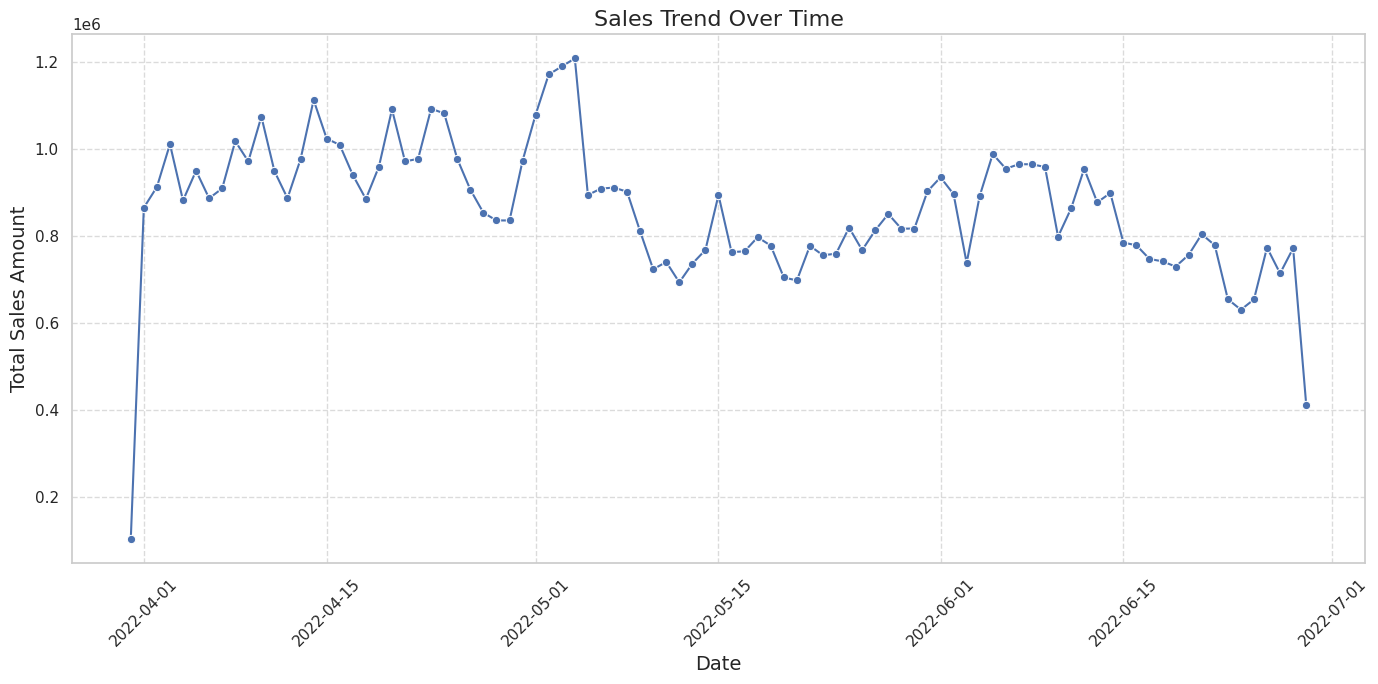

In [99]:
 # Part 2: Sales Overview

# Aggregate sales by date
sales_overview = df.groupby('Date')['Amount'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=sales_overview, x='Date', y='Amount', marker='o', color='b')
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Total Sales Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/content/sales_trend_over_time.png')
plt.show()

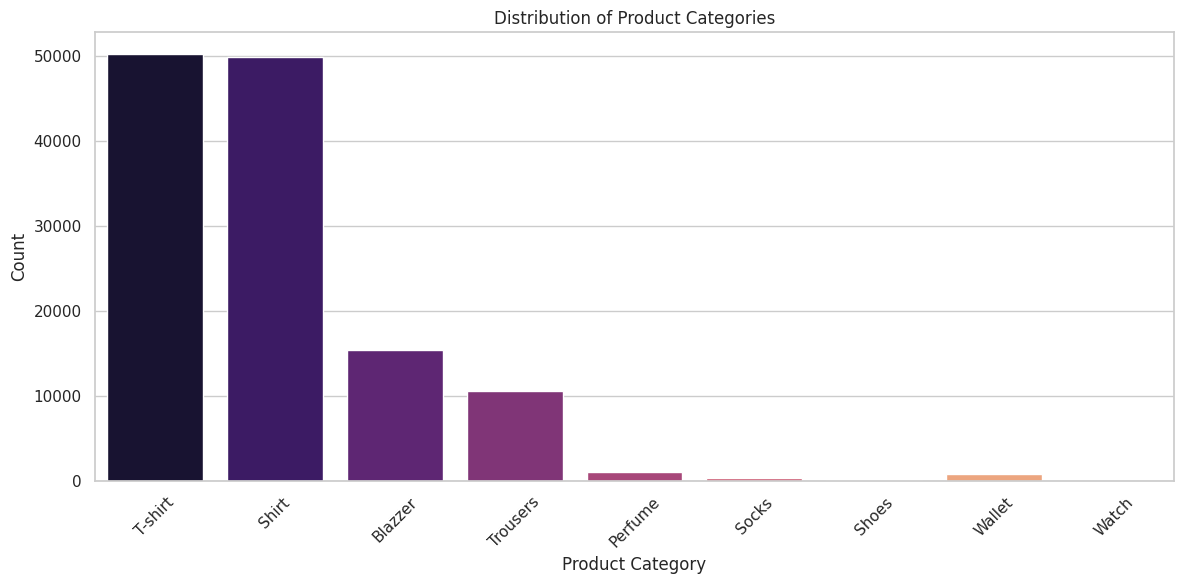

<Figure size 640x480 with 0 Axes>

In [100]:
# Part 3: Product Analysis

# Distribution of product categories
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Category', hue='Category', palette='magma', legend=False)
plt.title('Distribution of Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/Distribution_of_Product_Categories')

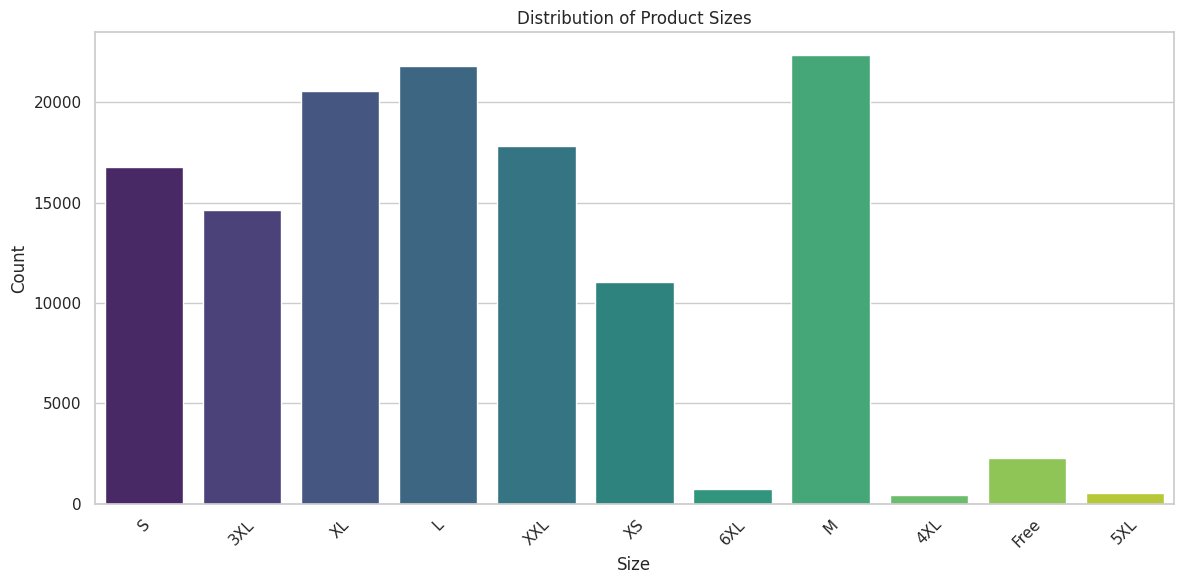

<Figure size 640x480 with 0 Axes>

In [101]:
# Distribution of sizes
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Size', hue='Size', palette='viridis', legend=False)  # Assigning `x` to `hue`
plt.title('Distribution of Product Sizes')
plt.xlabel('Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/Distribution_of_Product_Sizes.png')

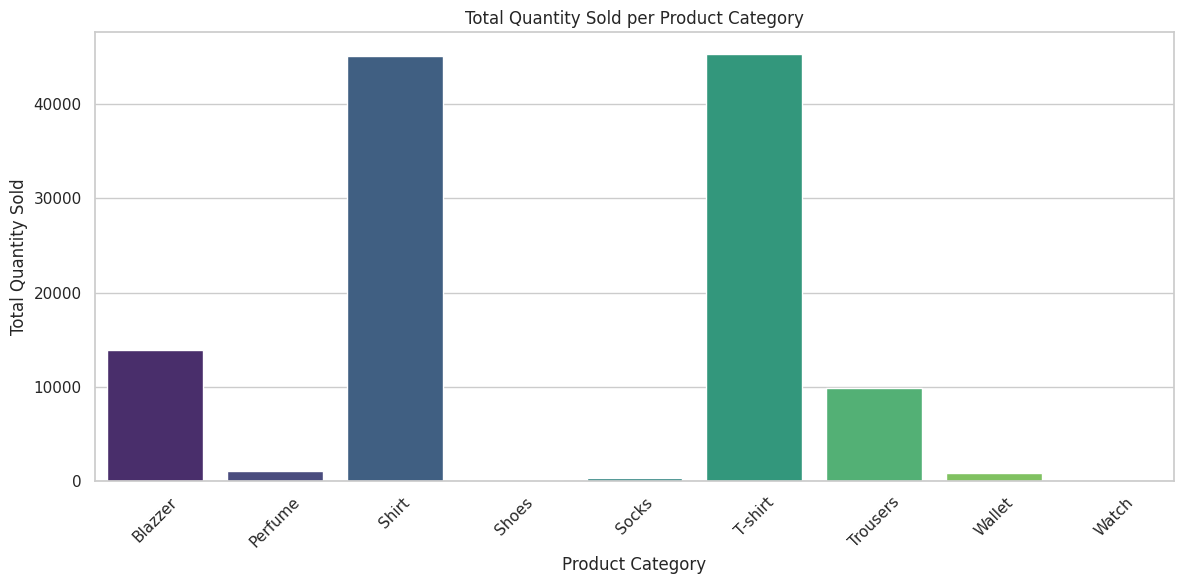

<Figure size 640x480 with 0 Axes>

In [102]:
# Total quantity sold per category
plt.figure(figsize=(12, 6))
sns.barplot(data=category_qty, x='Category', y='Qty', hue='Category', palette='viridis', dodge=False)
plt.title('Total Quantity Sold per Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig('/content/Total_Quantity_Sold_per_Product_Category.png')

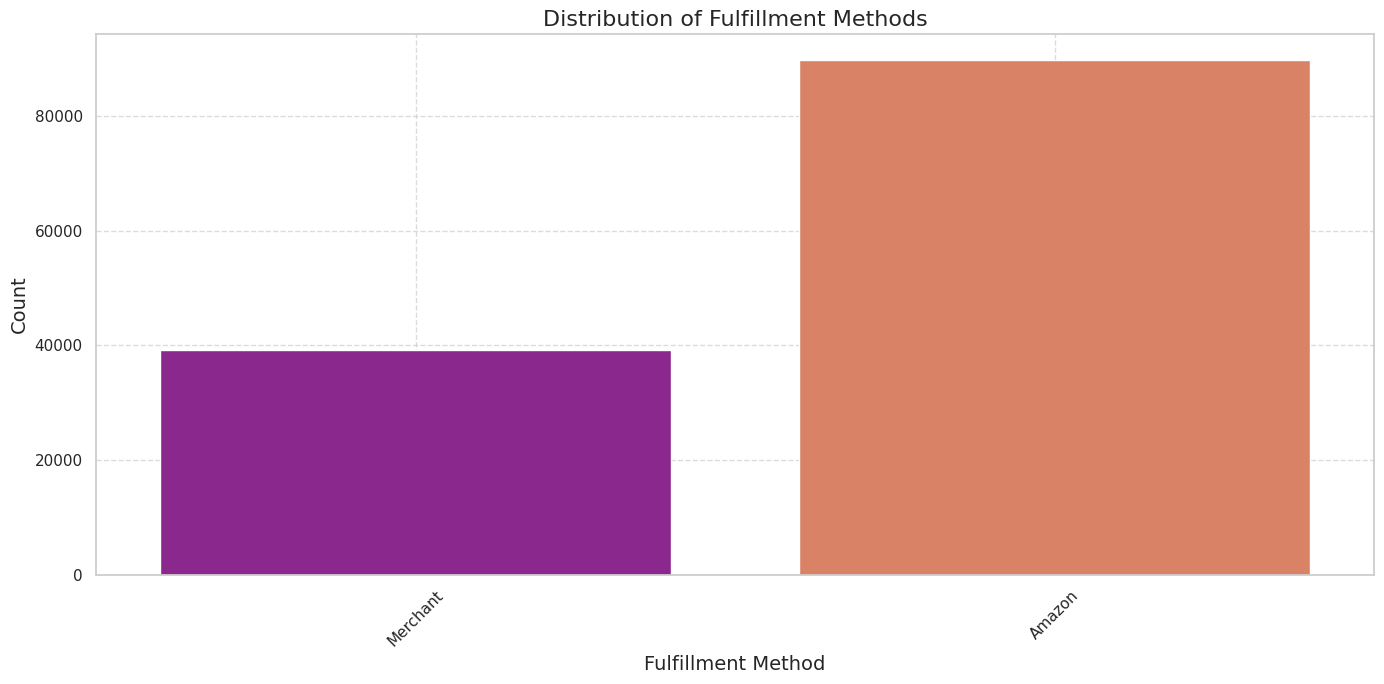

In [103]:
# Part 4: Fulfillment Analysis

# Distribution of fulfillment methods
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='Fulfilment', hue='Fulfilment', palette='plasma', legend=False)
plt.title('Distribution of Fulfillment Methods', fontsize=16)
plt.xlabel('Fulfillment Method', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/content/fulfillment_methods_distribution.png')
plt.show()

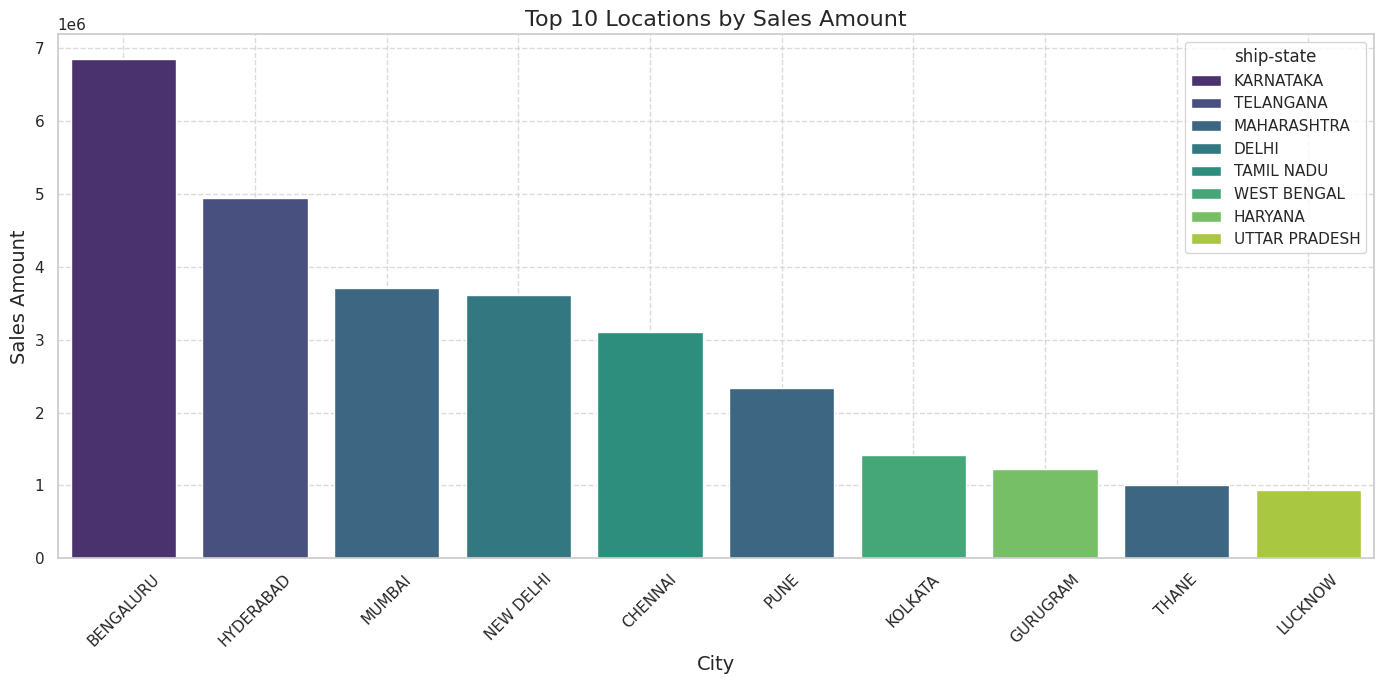

In [104]:
# Part 5: Customer Segmentation

# Example: Segmenting customers based on location
location_sales = df.groupby(['ship-city', 'ship-state'])['Amount'].sum().reset_index()
top_locations = location_sales.nlargest(10, 'Amount')  # Top 10 locations

plt.figure(figsize=(14, 7))
sns.barplot(data=top_locations, x='ship-city', y='Amount', hue='ship-state', palette='viridis')
plt.title('Top 10 Locations by Sales Amount', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Sales Amount', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('/content/top_locations_sales_amount.png')
plt.show()

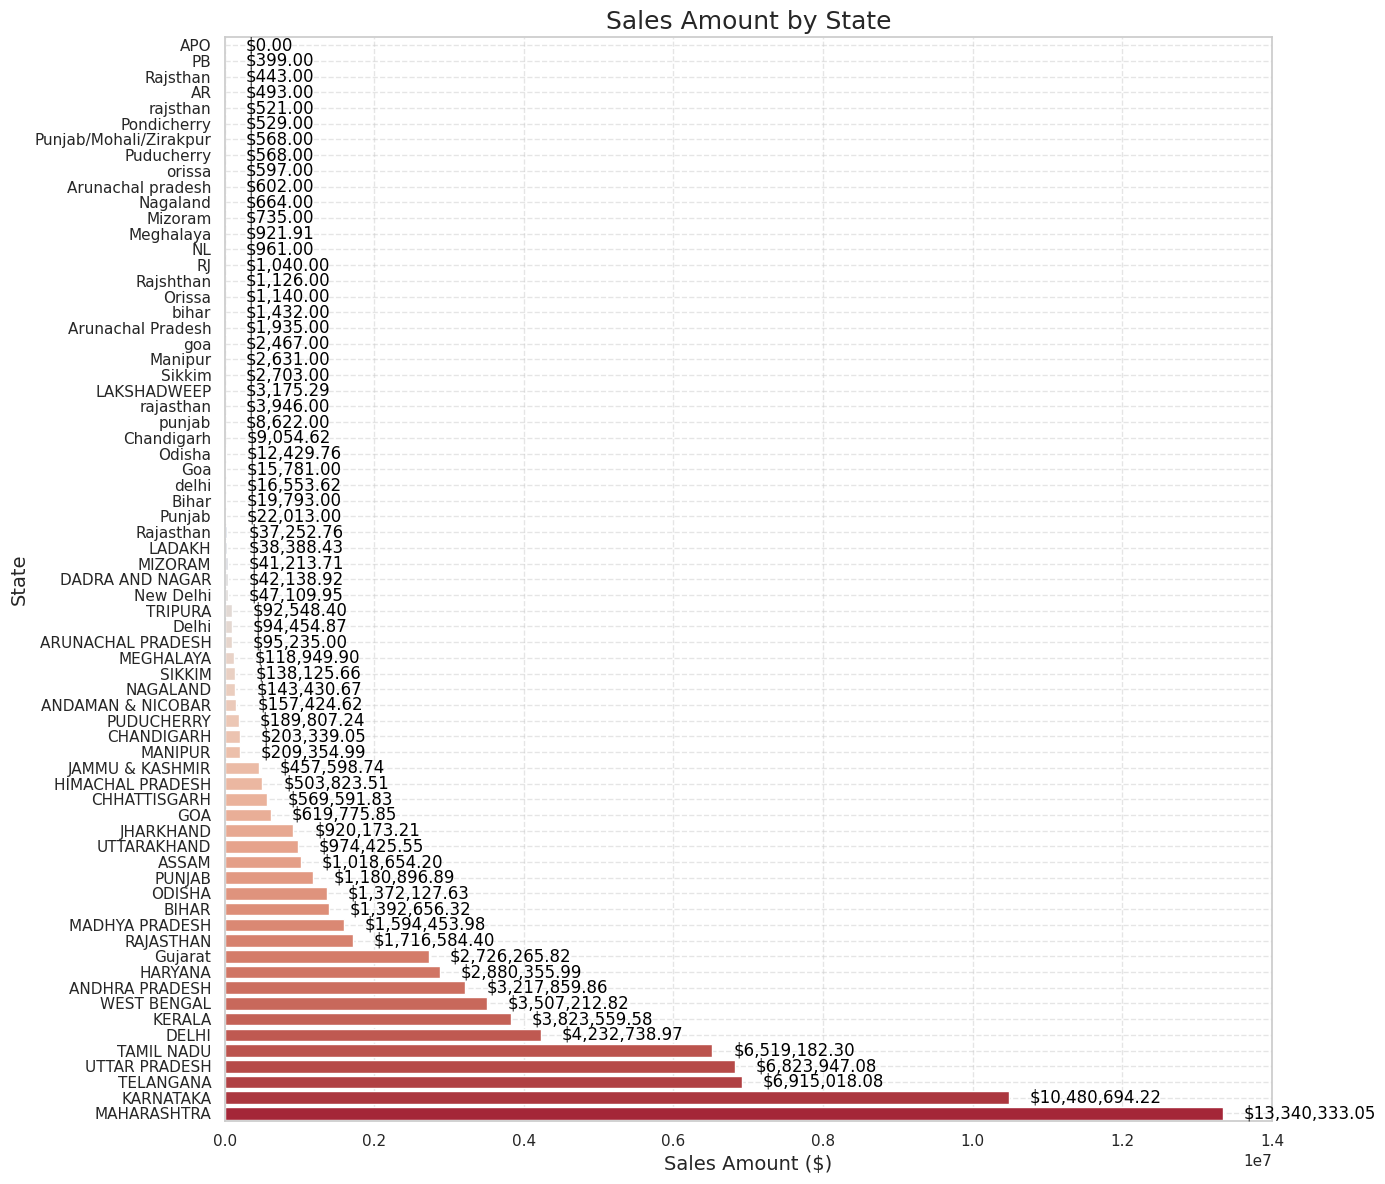

In [105]:

# Aggregate sales by state
state_sales = df.groupby('ship-state')['Amount'].sum().reset_index()

# Sort states by sales amount
state_sales = state_sales.sort_values('Amount', ascending=True)

# Increase figure height to reduce text overlap
plt.figure(figsize=(14, 12))  # Increased height
bar_plot = sns.barplot(data=state_sales, y='ship-state', x='Amount', hue='ship-state', palette='coolwarm', legend=False)

# Add title and labels
plt.title('Sales Amount by State', fontsize=18)
plt.xlabel('Sales Amount ($)', fontsize=14)
plt.ylabel('State', fontsize=14)

# Annotate bars with sales amount
for p in bar_plot.patches:
    width = p.get_width()
    bar_plot.annotate(f'${width:,.2f}',
                      (width, p.get_y() + p.get_height() / 2),
                      ha='left', va='center',
                      xytext=(15, 0),  # Adjusted position to prevent overlap
                      textcoords='offset points',
                      fontsize=12, color='black')

# Customize grid and layout
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('/content/sales_amount_by_state_horizontal_bar.png')
plt.show()


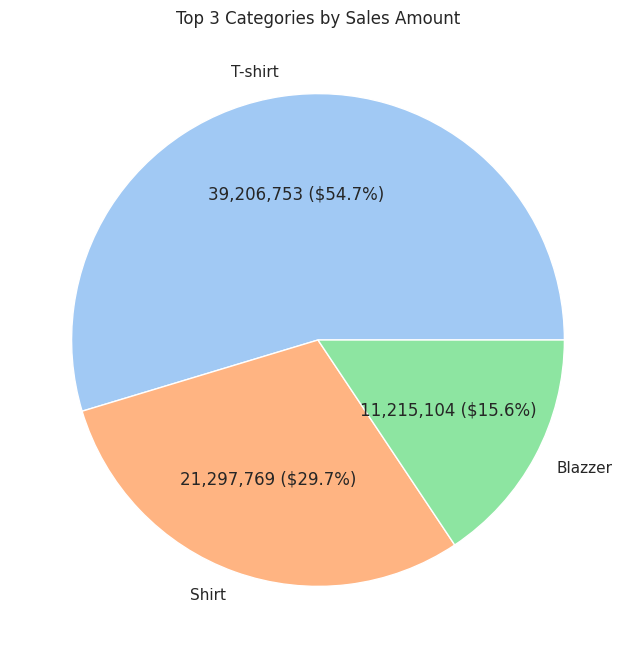

<Figure size 640x480 with 0 Axes>

In [106]:
# Part 7: Business Insights

# Provide insights based on the analysis
top_categories = df.groupby('Category')['Amount'].sum().nlargest(3).reset_index()

def func(pct, all_values):
    absolute = int(pct / 100. * sum(all_values))
    return f'{absolute:,} (${pct:.1f}%)'

# Pie chart for top 3 categories
plt.figure(figsize=(8, 8))
plt.pie(top_categories['Amount'],
        labels=top_categories['Category'],
        autopct=lambda pct: func(pct, top_categories['Amount']),
        colors=sns.color_palette('pastel'))
plt.title('Top 3 Categories by Sales Amount')
plt.show()

plt.savefig('/content/top_3_categories_by_sales_amount.png')

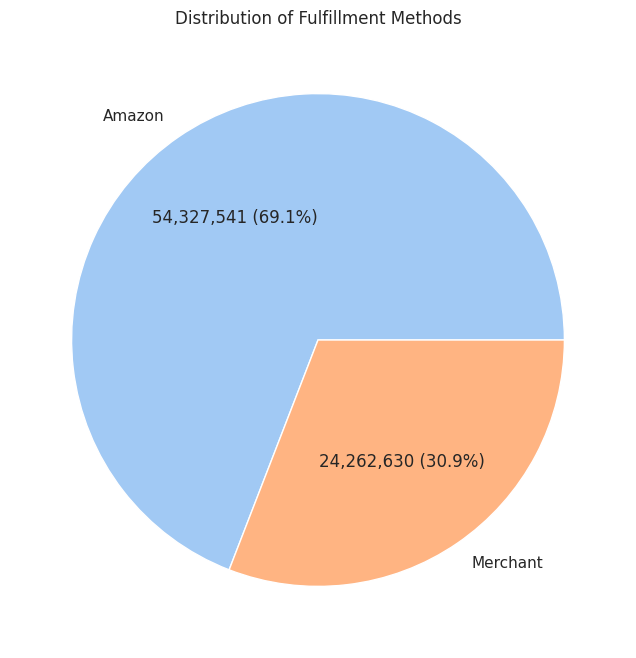

<Figure size 640x480 with 0 Axes>

In [107]:
#Most effective fulfillment method

fulfillment_summary = df.groupby('Fulfilment')['Amount'].sum().reset_index()

def func(pct, all_values):
    absolute = int(pct / 100. * sum(all_values))
    return f'{absolute:,} ({pct:.1f}%)'

# Pie chart for fulfillment methods
plt.figure(figsize=(8, 8))
plt.pie(fulfillment_summary['Amount'],
        labels=fulfillment_summary['Fulfilment'],
        autopct=lambda pct: func(pct, fulfillment_summary['Amount']),
        colors=sns.color_palette('pastel'))
plt.title('Distribution of Fulfillment Methods')
plt.show()
plt.savefig('/content/Distribution_of_Fulfillment_Methods.png')